In [1]:
#Load 'financial_phrasebank' corpus 
from datasets import load_dataset
datasets = load_dataset('financial_phrasebank', 'sentences_66agree')
print(datasets["train"][0])

Reusing dataset financial_phrasebank (/home/jingyang/.cache/huggingface/datasets/financial_phrasebank/sentences_66agree/1.0.0/a6d468761d4e0c8ae215c77367e1092bead39deb08fbf4bffd7c0a6991febbf0)


  0%|          | 0/1 [00:00<?, ?it/s]

{'label': 1, 'sentence': 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'}


In [2]:
#Load corpus into dataframe
import pandas as pd
df = pd.DataFrame.from_dict(datasets["train"])
df

,sentence,label
0,"According to Gran , the company has no plans t...",1
1,Technopolis plans to develop in stages an area...,1
2,With the new production plant the company woul...,2
3,According to the company 's updated strategy f...,2
4,"For the last quarter of 2010 , Componenta 's n...",2
...,...,...
4212,HELSINKI Thomson Financial - Shares in Cargote...,0
4213,LONDON MarketWatch -- Share prices ended lower...,0
4214,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4215,Operating profit fell to EUR 35.4 mn from EUR ...,0


In [3]:
#Clean sentences. All punctuation, special characters are removed. All uppercase letters are converted to lowercase.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re

table = str.maketrans('', '', string.punctuation)

def clean(sent):
    words = re.split(r'\W+', sent)
    rem_punc = [word.translate(table) for word in words]
    cleaned =  ' '.join([word.lower() for word in rem_punc if word.lower() not in stopwords.words('english')])
    output = re.sub(r'\d+', '', cleaned)
    return output

df['sentence'] = df['sentence'].apply(lambda sent: clean(sent))
df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jingyang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentence,label
0,according gran company plans move production r...,1
1,technopolis plans develop stages area less s...,1
2,new production plant company would increase ca...,2
3,according company updated strategy years bas...,2
4,last quarter componenta net sales doubled eur...,2


In [4]:
#generate Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(analyzer='word')
data = count_vec.fit_transform(df['sentence'])
df_count_vec = pd.DataFrame(data.toarray(), columns = count_vec.get_feature_names())
df_count_vec.index = df.index
df_count_vec.drop([col for col, val in df_count_vec.sum().iteritems() if val < 25], axis=1, inplace=True)
df_count_vec

,according,acquired,acquisition,added,addition,adp,afx,ago,agreed,agreement,...,well,whole,work,world,worth,would,www,year,years,yit
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


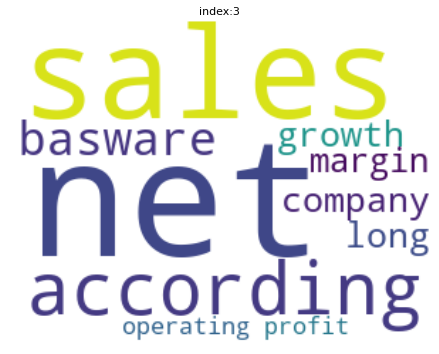

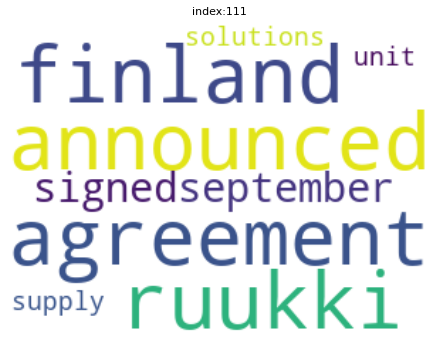

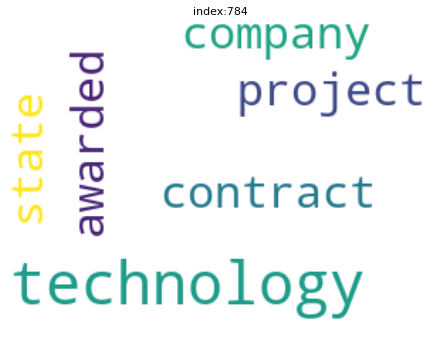

In [5]:
#generate wordclouds
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

def generate_wordcloud(data,title):
    wc = WordCloud(width=300, height=230, max_words=10, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(8,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=11)
    plt.show()

generate_wordcloud(df_count_vec.loc[3],'index:'+str(3))
generate_wordcloud(df_count_vec.loc[111],'index:'+str(111))
generate_wordcloud(df_count_vec.loc[784],'index:'+str(784))


/home/jingyang/anaconda3/envs/olamproject/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


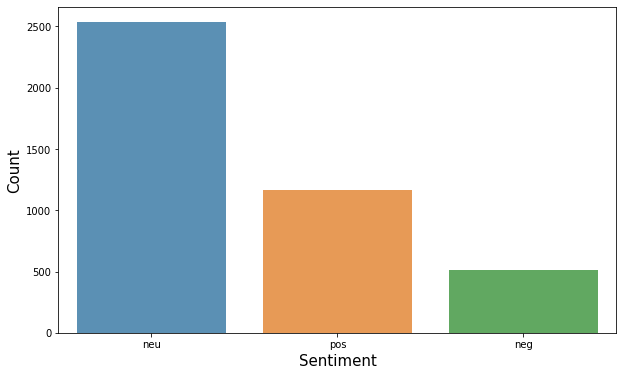

In [6]:
#Generate plot for class distribution
import seaborn as sns
df['sentiment'] = df['label'].map({0: 'neg', 1:'neu', 2:'pos'})
count = df['sentiment'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Sentiment', fontsize=15)
plt.show();

/home/jingyang/anaconda3/envs/olamproject/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='polarity'>

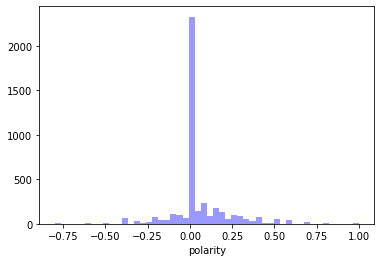

In [7]:
#generate plot based on textblob polarity
from textblob import TextBlob

df['polarity'] = df['sentence'].apply(lambda sent: TextBlob(sent).sentiment.polarity)
sns.distplot(df['polarity'], kde=False, color='blue', bins=50)

<AxesSubplot:xlabel='readability'>

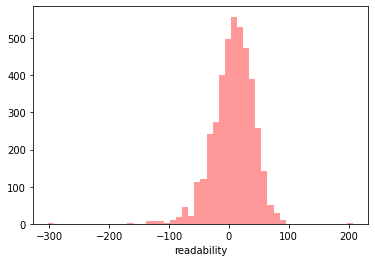

In [8]:
#generate histogram based on readability i.e., Flesch reading ease score
# A larger proportion of headlines have low tor negative flesch scores which indicate high difficultly and highly technical sentences.
from textstat import flesch_reading_ease

df['readability'] = df['sentence'].apply(lambda sent : flesch_reading_ease(sent))
sns.distplot(df['readability'], kde=False, color='red', bins=50)

<AxesSubplot:xlabel='diversity'>

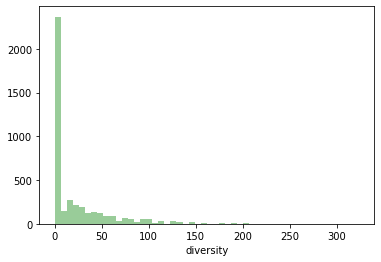

In [9]:
#generate histogram based on lexical diversity i.e., Measure of lexical textual diversity (MTLD)
#Most headlines had low MTLD scores which implies low lexical diversity
from lexical_diversity import lex_div as ld

def lex_div(sent):
    tokens = ld.tokenize(sent)
    mtld = ld.mtld(tokens)
    return mtld

df['diversity'] = df['sentence'].apply(lambda sent : lex_div(sent))
sns.distplot(df['diversity'], kde=False, color='green', bins=50)